In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load datasets
customers = pd.read_csv('/Users/varsharani/Downloads/Customers.csv')
products = pd.read_csv('/Users/varsharani/Downloads/Products.csv')
transactions = pd.read_csv('/Users/varsharani/Downloads/Transactions.csv')


# Checking missing Value and drop duplicate

In [3]:
#missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Drop duplicates
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

# Convert dates to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [4]:
merged = transactions.merge(customers, on='CustomerID', how='left')
merged = merged.merge(products, on='ProductID', how='left')

# Checking for Outliers

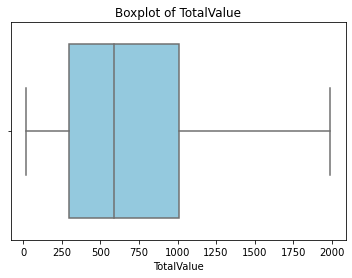

In [5]:
# Boxplot for 'TotalValue' column in transactions
sns.boxplot(data=merged, x=merged['TotalValue'], color='skyblue')
plt.title('Boxplot of TotalValue')
plt.xlabel('TotalValue')
plt.show()


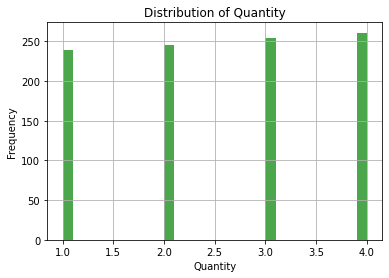

In [6]:
# Histogram for 'Quantity'
merged['Quantity'].hist(bins=30, color='green', alpha=0.7)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Exploratory Data Analysis (EDA)

# CUSTOMERS BY REGION

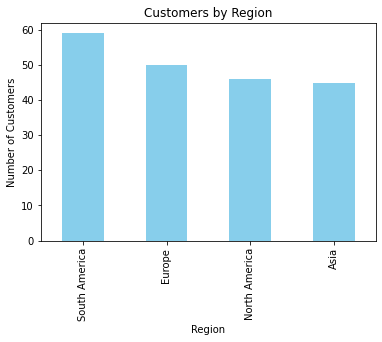

In [7]:
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title='Customers by Region', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# 2. Top-selling products

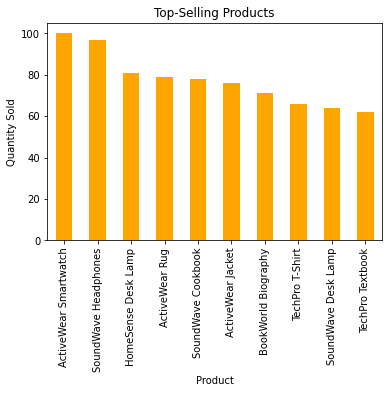

In [8]:
top_products = merged.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top-Selling Products', color='orange')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

# 3. Revenue over time

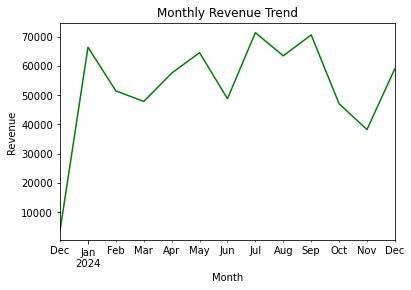

In [9]:

merged['TransactionDate'] = pd.to_datetime(merged['TransactionDate'])
merged['Month'] = merged['TransactionDate'].dt.to_period('M')

monthly_revenue = merged.groupby('Month')['TotalValue'].sum()
monthly_revenue.plot(title='Monthly Revenue Trend', color='green')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


# 4. Revenue by region

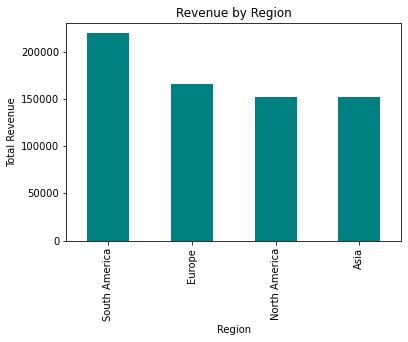

In [10]:
region_revenue = merged.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_revenue.plot(kind='bar', title='Revenue by Region', color='teal')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

# 5. Revenue over time

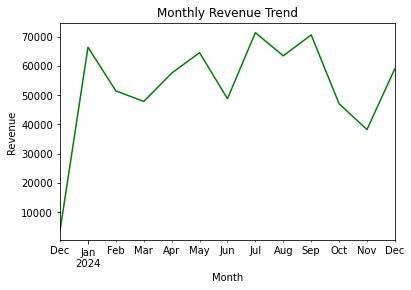

In [11]:
merged['TransactionDate'] = pd.to_datetime(merged['TransactionDate'])
merged['Month'] = merged['TransactionDate'].dt.to_period('M')

monthly_revenue = merged.groupby('Month')['TotalValue'].sum()
monthly_revenue.plot(title='Monthly Revenue Trend', color='green')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()
